<a href="https://colab.research.google.com/github/PaulaDiz/LABORATORIOS/blob/main/LAB02_Grupo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica	1	(reglas	de	Asociación)**

I) Usaremos la librería con el Dataset Market_Basket_Optimisation.csv que se ha proporcionado.

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase **association_rules** y un par de configuraciones cambiando la variable **metric** y **min_threshold**.

Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado?





Importamos las librerías necesarias y cargamos el dataset Market_Basket_Optimisation.csv

In [ ]:
import pandas as pd
from mlxtend.cluster import Kmeans
import numpy as np
from mlxtend import *
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
#Carga de la base de datos
import pandas as pd
# Carga el dataset
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convertimos los datos a un formato de "cesta de compras" o one-hot encoding: lo haremos poniendo cada item como variable y si se encuentra en la transacción sera "TRUE", sino se encuentra en la transacción sera "FALSE".

In [ ]:
transacciones = []

# Se recorren todas las columnas de la fila y se añaden los valores a la lista de transacciones si el valor no es un valor NaN
for i in range(0, dataset.shape[0]):
    transacciones.append([str(dataset.values[i,j]) for j in range(dataset.shape[1]) if str(dataset.values[i,j]) != 'nan'])

te = TransactionEncoder() # Utilizaremos esto para convertir la base de datos en one-hot.
te_ary = te.fit(transacciones).transform(transacciones)

# Aplicamos TransactionEncoder a las transacciones y luego se transforma la lista de transacciones en una matriz de transacciones codificadas.
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

**PRIMERA CONFIGURACIÓN**



1. Empezaremos obteniendo los itemsets frecuentes para cada k.




In [ ]:
# ITEMSETS CONFIGURACIÓN 1

# Obtener todos los itemsets frecuentes
soporte_1=0.01
itemsets_1 = apriori(df, min_support=soporte_1, use_colnames=True)

itemsets_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


2. Mostrar todas las posibles reglas con la confianza de cada una de ellas

In [ ]:
# REGLAS CONFIGURACIÓN 1 PUNTUACION:CONFIANZA

# Generar todas las reglas de asociación posibles a partir de los itemsets
todas_las_reglas_conf1 = association_rules(itemsets_1, metric="confidence", min_threshold=0)

# Listar las reglas con su confianza
print(todas_las_reglas_conf1[['antecedents', 'consequents', 'confidence']])

                   antecedents                 consequents  confidence
0              (mineral water)                   (avocado)    0.048658
1                    (avocado)             (mineral water)    0.348000
2                       (cake)                   (burgers)    0.141447
3                    (burgers)                      (cake)    0.131498
4                  (chocolate)                   (burgers)    0.104150
..                         ...                         ...         ...
427  (mineral water, pancakes)                 (spaghetti)    0.339921
428      (spaghetti, pancakes)             (mineral water)    0.455026
429            (mineral water)       (spaghetti, pancakes)    0.048098
430                (spaghetti)   (mineral water, pancakes)    0.065850
431                 (pancakes)  (mineral water, spaghetti)    0.120617

[432 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.  Listar todas las reglas que sean de alta confianza.

In [ ]:
# REGALAS FILTRADAS POR CONF MINIMA CONFIGURACIÓN 1

conf_min = 0.3

# Filtrar las reglas por el valor de confianza mínimo
Reglas_filtradas1 = todas_las_reglas_conf1[todas_las_reglas_conf1['confidence'] >= conf_min]

# Listar las reglas filtradas con su confianza
print(Reglas_filtradas1[['antecedents', 'consequents','support', 'confidence']])

                    antecedents      consequents   support  confidence
1                     (avocado)  (mineral water)  0.011598    0.348000
7                     (burgers)           (eggs)  0.028796    0.330275
39                       (cake)  (mineral water)  0.027463    0.338816
45                    (cereals)  (mineral water)  0.010265    0.398964
58                    (chicken)  (mineral water)  0.022797    0.380000
..                          ...              ...       ...         ...
416           (spaghetti, milk)  (mineral water)  0.015731    0.443609
420  (olive oil, mineral water)      (spaghetti)  0.010265    0.371981
421      (olive oil, spaghetti)  (mineral water)  0.010265    0.447674
427   (mineral water, pancakes)      (spaghetti)  0.011465    0.339921
428       (spaghetti, pancakes)  (mineral water)  0.011465    0.455026

[63 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGLAS CONFIGURACIÓN 1 PUNTUACION:LIFT

# Generar todas las reglas de asociación posibles a partir de los itemsets
todas_las_reglas_lift_1 = association_rules(itemsets_1, metric="lift", min_threshold=0)

# Listar las reglas con su confianza
print(todas_las_reglas_lift_1[['antecedents', 'consequents', 'lift']])

                   antecedents                 consequents      lift
0              (mineral water)                   (avocado)  1.459926
1                    (avocado)             (mineral water)  1.459926
2                       (cake)                   (burgers)  1.622319
3                    (burgers)                      (cake)  1.622319
4                  (chocolate)                   (burgers)  1.194537
..                         ...                         ...       ...
427  (mineral water, pancakes)                 (spaghetti)  1.952333
428      (spaghetti, pancakes)             (mineral water)  1.908923
429            (mineral water)       (spaghetti, pancakes)  1.908923
430                (spaghetti)   (mineral water, pancakes)  1.952333
431                 (pancakes)  (mineral water, spaghetti)  2.019529

[432 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGALAS FILTRADAS POR ANTECEDENTE CONFIGURACIÓN 1

antecedente = {'eggs'}

# Filtrar reglas por el antecedente
reglas_con_antecedente_1 = todas_las_reglas_conf1[todas_las_reglas_conf1['antecedents'].apply(lambda x: x == frozenset(antecedente))]

# Listar las reglas filtradas con su confianza
print(reglas_con_antecedente_1[['antecedents', 'consequents', 'confidence']])

    antecedents                   consequents  confidence
6        (eggs)                     (burgers)    0.160237
29       (eggs)                        (cake)    0.106083
51       (eggs)                     (chicken)    0.080119
67       (eggs)                   (chocolate)    0.184718
107      (eggs)                     (cookies)    0.058605
112      (eggs)                 (cooking oil)    0.065282
120      (eggs)                    (escalope)    0.061573
123      (eggs)                (french fries)    0.202522
125      (eggs)             (frozen smoothie)    0.061573
127      (eggs)           (frozen vegetables)    0.120920
128      (eggs)                   (green tea)    0.141691
130      (eggs)                 (ground beef)    0.111276
133      (eggs)               (herb & pepper)    0.069733
135      (eggs)              (low fat yogurt)    0.093472
137      (eggs)                        (milk)    0.171365
139      (eggs)               (mineral water)    0.283383
141      (eggs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


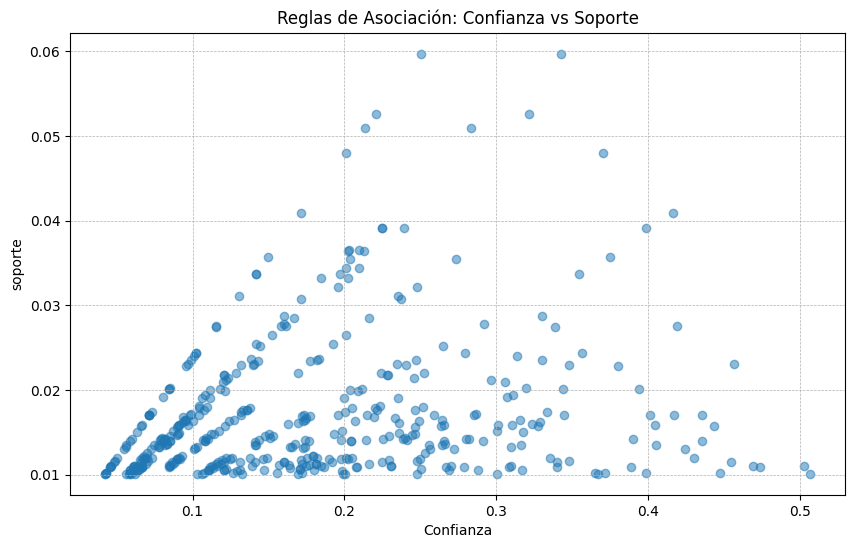

In [ ]:
# GRAFICA CONFIGURACIÓN 1


# Asumiendo que 'all_rules' es el DataFrame de reglas generado anteriormente

plt.figure(figsize=(10, 6))
plt.scatter(todas_las_reglas_conf1['confidence'], todas_las_reglas_conf1['support'], alpha=0.5)
plt.title('Reglas de Asociación: Confianza vs Soporte')
plt.xlabel('Confianza')
plt.ylabel('soporte')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


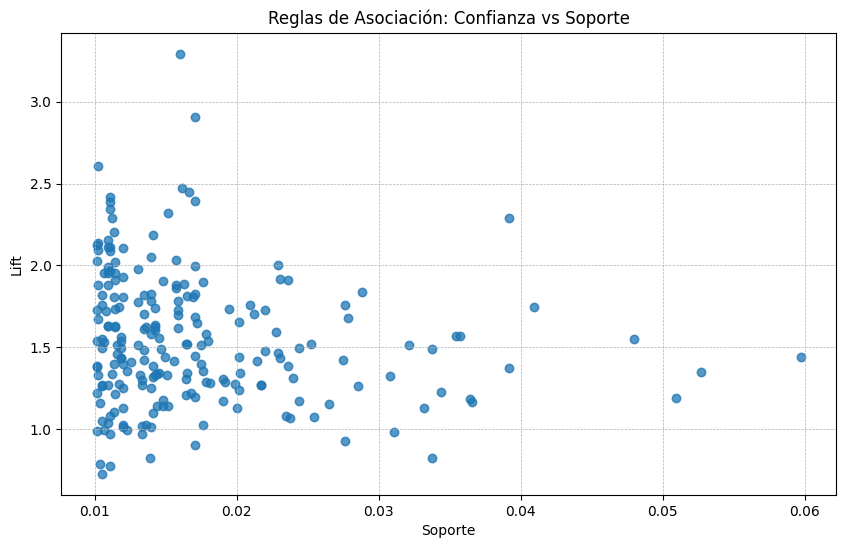

In [ ]:
# GRAFICA CONFIGURACIÓN 1
import matplotlib.pyplot as plt

# Asumiendo que 'all_rules' es el DataFrame de reglas generado anteriormente

plt.figure(figsize=(10, 6))
plt.scatter(todas_las_reglas_lift_1['support'], todas_las_reglas_lift_1['lift'], alpha=0.5)
plt.title('Reglas de Asociación: Confianza vs Soporte')
plt.xlabel('Soporte')
plt.ylabel('Lift')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# ITEMSETS CONFIGURACIÓN 2

# Obtener todos los itemsets frecuentes
soporte_2=0.03
itemsets_2 = apriori(df, min_support=soporte_2, use_colnames=True)

itemsets_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [ ]:
# REGLAS CONFIGURACIÓN 2 PUNTUACION:CONFIANZA

# Generar todas las reglas de asociación posibles a partir de los itemsets
todas_las_reglas_conf2 = association_rules(itemsets_2, metric="confidence", min_threshold=0)

# Listar las reglas con su confianza
print(todas_las_reglas_conf2[['antecedents', 'consequents', 'confidence']])

            antecedents          consequents  confidence
0           (chocolate)               (eggs)    0.202604
1                (eggs)          (chocolate)    0.184718
2           (chocolate)       (french fries)    0.209927
3        (french fries)          (chocolate)    0.201248
4           (chocolate)               (milk)    0.196094
5                (milk)          (chocolate)    0.247942
6           (chocolate)      (mineral water)    0.321400
7       (mineral water)          (chocolate)    0.220917
8           (chocolate)          (spaghetti)    0.239219
9           (spaghetti)          (chocolate)    0.225115
10       (french fries)               (eggs)    0.212949
11               (eggs)       (french fries)    0.202522
12               (milk)               (eggs)    0.237654
13               (eggs)               (milk)    0.171365
14      (mineral water)               (eggs)    0.213647
15               (eggs)      (mineral water)    0.283383
16          (spaghetti)        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGALAS FILTRADAS POR CONF MINIMA CONFIGURACIÓN 2

conf_min_2 = 0.2

# Filtrar las reglas por el valor de confianza mínimo
Reglas_filtradas2 = todas_las_reglas_conf2[todas_las_reglas_conf2['confidence'] >= conf_min]

# Listar las reglas filtradas con su confianza
print(Reglas_filtradas2[['antecedents', 'consequents','support', 'confidence']])

            antecedents      consequents   support  confidence
6           (chocolate)  (mineral water)  0.052660    0.321400
20  (frozen vegetables)  (mineral water)  0.035729    0.374825
25        (ground beef)  (mineral water)  0.040928    0.416554
27        (ground beef)      (spaghetti)  0.039195    0.398915
29               (milk)  (mineral water)  0.047994    0.370370
33           (pancakes)  (mineral water)  0.033729    0.354839
35          (spaghetti)  (mineral water)  0.059725    0.343032


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGLAS CONFIGURACIÓN 2 PUNTUACION:LIFT

# Generar todas las reglas de asociación posibles a partir de los itemsets
todas_las_reglas_lift_2 = association_rules(itemsets_2, metric="lift", min_threshold=0)

# Listar las reglas con su confianza
print(todas_las_reglas_lift_2[['antecedents', 'consequents', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            antecedents          consequents      lift
0           (chocolate)               (eggs)  1.127397
1                (eggs)          (chocolate)  1.127397
2           (chocolate)       (french fries)  1.228284
3        (french fries)          (chocolate)  1.228284
4           (chocolate)               (milk)  1.513276
5                (milk)          (chocolate)  1.513276
6           (chocolate)      (mineral water)  1.348332
7       (mineral water)          (chocolate)  1.348332
8           (chocolate)          (spaghetti)  1.373952
9           (spaghetti)          (chocolate)  1.373952
10       (french fries)               (eggs)  1.184961
11               (eggs)       (french fries)  1.184961
12               (milk)               (eggs)  1.322437
13               (eggs)               (milk)  1.322437
14      (mineral water)               (eggs)  1.188845
15               (eggs)      (mineral water)  1.188845
16          (spaghetti)               (eggs)  1.167446
17        

In [ ]:
# REGALAS FILTRADAS POR ANTECEDENTE CONFIGURACIÓN 2

antecedente = {'eggs'}

# Filtrar reglas por el antecedente
reglas_con_antecedente_2 = todas_las_reglas_conf2[todas_las_reglas_conf2['antecedents'].apply(lambda x: x == frozenset(antecedente))]

# Listar las reglas filtradas con su confianza
print(reglas_con_antecedente_2[['antecedents', 'consequents', 'confidence']])

   antecedents      consequents  confidence
1       (eggs)      (chocolate)    0.184718
11      (eggs)   (french fries)    0.202522
13      (eggs)           (milk)    0.171365
15      (eggs)  (mineral water)    0.283383
17      (eggs)      (spaghetti)    0.203264


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


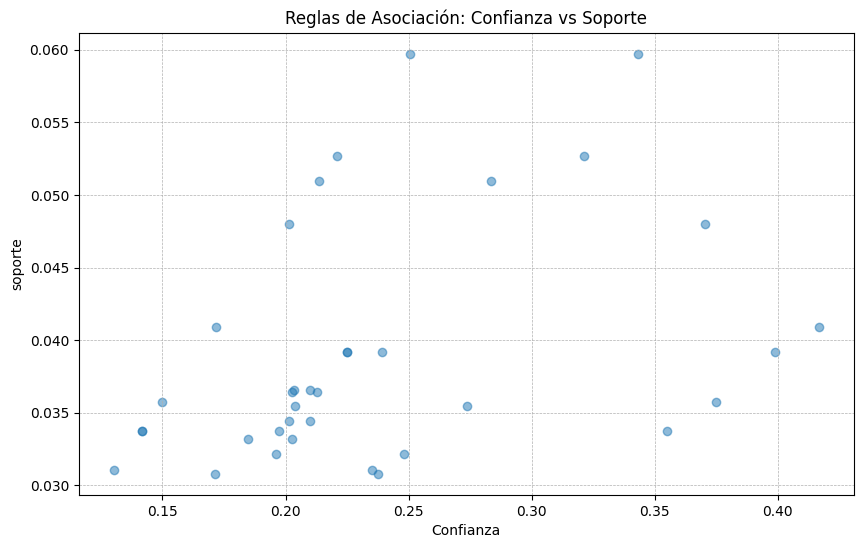

In [ ]:
# GRAFICA CONFIGURACIÓN 2
import matplotlib.pyplot as plt

# Asumiendo que 'all_rules' es el DataFrame de reglas generado anteriormente

plt.figure(figsize=(10, 6))
plt.scatter(todas_las_reglas_conf2['confidence'], todas_las_reglas_conf2['support'], alpha=0.5)
plt.title('Reglas de Asociación: Confianza vs Soporte')
plt.xlabel('Confianza')
plt.ylabel('soporte')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# ITEMSETS CONFIGURACIÓN 3

# Obtener todos los itemsets frecuentes
soporte_3=0.05
itemsets_3 = apriori(df, min_support=soporte_3, use_colnames=True)

itemsets_3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [ ]:
# REGLAS CONFIGURACIÓN 3 PUNTUACION:CONFIANZA

# Generar todas las reglas de asociación posibles a partir de los itemsets
todas_las_reglas_conf3 = association_rules(itemsets_3, metric="confidence", min_threshold=0)

# Listar las reglas con su confianza
print(todas_las_reglas_conf3[['antecedents', 'consequents', 'confidence']])

       antecedents      consequents  confidence
0      (chocolate)  (mineral water)    0.321400
1  (mineral water)      (chocolate)    0.220917
2  (mineral water)           (eggs)    0.213647
3           (eggs)  (mineral water)    0.283383
4  (mineral water)      (spaghetti)    0.250559
5      (spaghetti)  (mineral water)    0.343032


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGALAS FILTRADAS POR CONF MINIMA CONFIGURACIÓN 3

conf_min_3 = 0.4

# Filtrar las reglas por el valor de confianza mínimo
Reglas_filtradas3 = todas_las_reglas_conf3[todas_las_reglas_conf3['confidence'] >= conf_min]

# Listar las reglas filtradas con su confianza
print(Reglas_filtradas3[['antecedents', 'consequents','support', 'confidence']])

   antecedents      consequents   support  confidence
0  (chocolate)  (mineral water)  0.052660    0.321400
5  (spaghetti)  (mineral water)  0.059725    0.343032


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGLAS CONFIGURACIÓN 3 PUNTUACION:LIFT

# Generar todas las reglas de asociación posibles a partir de los itemsets
todas_las_reglas_lift_3 = association_rules(itemsets_3, metric="lift", min_threshold=0)

# Listar las reglas con su confianza
print(todas_las_reglas_lift_3[['antecedents', 'consequents', 'lift']])

       antecedents      consequents      lift
0      (chocolate)  (mineral water)  1.348332
1  (mineral water)      (chocolate)  1.348332
2  (mineral water)           (eggs)  1.188845
3           (eggs)  (mineral water)  1.188845
4  (mineral water)      (spaghetti)  1.439085
5      (spaghetti)  (mineral water)  1.439085


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# REGALAS FILTRADAS POR ANTECEDENTE CONFIGURACIÓN 3

antecedente = {'chocolate'}

# Filtrar reglas por el antecedente
reglas_con_antecedente_3 = todas_las_reglas_conf3[todas_las_reglas_conf3['antecedents'].apply(lambda x: x == frozenset(antecedente))]

# Listar las reglas filtradas con su confianza
print(reglas_con_antecedente_3[['antecedents', 'consequents', 'confidence']])

   antecedents      consequents  confidence
0  (chocolate)  (mineral water)      0.3214


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


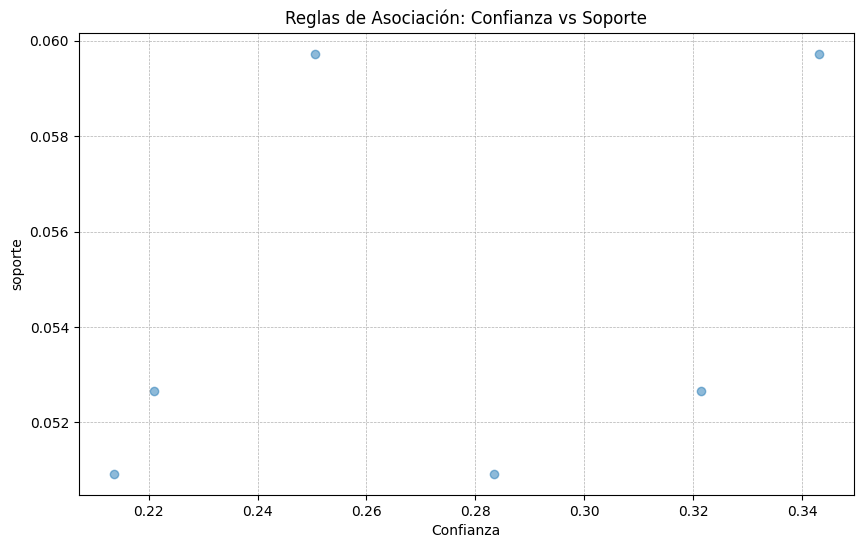

In [ ]:
# GRAFICA CONFIGURACIÓN 3
import matplotlib.pyplot as plt

# Asumiendo que 'all_rules' es el DataFrame de reglas generado anteriormente

plt.figure(figsize=(10, 6))
plt.scatter(todas_las_reglas_conf3['confidence'], todas_las_reglas_conf3['support'], alpha=0.5)
plt.title('Reglas de Asociación: Confianza vs Soporte')
plt.xlabel('Confianza')
plt.ylabel('soporte')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

Cuanto mayor es la configuración más reglas se eliminan, ya que la mayoria se concentran en un soporte de 0.01. Tambien podemos obserbar en las diferentes gráficas que a menor soporte mayor confianza, en este caso las reglsa más simples son las mas importamtes, ya que tanto como en la confianza y lift a menor soporte mayor confianza y lift.

# **Práctica	2	(Patrones	Secuenciales)**

El conjunto de datos “Online Retail.xlsx” contiene productos (definidos por la columna StockCode y
Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes
momentos (definidos por el campo InvoiceDate. Habrá que procesar el fichero para crear una lista de los
distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes. Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden
compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo
aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la
librería gsppy.  
Prueba al menos dos configuraciones de soporte diferentes.  
Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos.
Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza
tengan

#**Desarrollo del problema**

La línea de comando pip install gsp_python es un comando que se utiliza para instalar un paquete de Python llamado gsp_python mediante el sistema de gestión de paquetes pip.

In [ ]:
pip install gsp_python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importamos las librerías necesarias para poder realizar el ejercicio

In [ ]:
import pandas as pd
from gsp_python.gsp import load_ds
from gsp_python.gsp import GSP

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cargamos la base de datos con la que vamos a realizar el ejercicio.

In [ ]:
# Carga del dataset
df = pd.read_excel('Online Retail.xlsx')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#**Limpieza de los datos**

Este tipo de datos se refieren a aquellas variables que toman valores 'null'. Por tanto, se utilizará la función `isnull().sum()` para ver la suma de dichos valores en cada una de las variables de la base de datos.

In [ ]:
total_nan_values = df.isnull().sum()
total_nan_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [ ]:
# Eliminar filas con valores nulos en columnas importantes
df.dropna(subset=['CustomerID', 'StockCode', 'Description', 'InvoiceDate'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Se lleva a cabo una limpieza de los posibles datos duplicados que no se hayan podido percibir a simple vista.

In [ ]:
df = df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La base de datos consta de información **organizada en 541996 filas y 8 columnas**. Asimismo, se utilizará el comando dtypes con el fin de imprimir, junto a cada variable, el tipo de dato al que pertenece.

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

Limpiamos y preparamos los datos para análisis posteriores, asegurando que las columnas clave tengan el tipo de datos correcto y estén libres de valores nulos que podrían causar problemas en el análisis.

In [ ]:
# Eliminar filas con valores nulos en columnas importantes
df.dropna(subset=['CustomerID', 'StockCode', 'Description', 'InvoiceDate'], inplace=True)
# Convertir CustomerID a tipo entero (si es necesario)
df['CustomerID'] = df['CustomerID'].astype(int)
# Convertir InvoiceDate a tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Asegurando que StockCode es un string
df['StockCode'] = df['StockCode'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-af87a0d5cb96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID', 'StockCode', 'Description', 'InvoiceDate'], inplace=True)
<ipython-input-30-af87a0d5cb96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Creamos un nuevo conjunto de datos (datos) que contiene solo las columnas seleccionadas ('StockCode', 'Description', 'CustomerID' y 'InvoiceDate') del DataFrame original, lo que facilita el análisis y la manipulación de datos específicos.

In [ ]:
# Seleccionar las columnas específicas
selected_columns = ['StockCode', 'Description', 'CustomerID', 'InvoiceDate']
# Crear una nueva matriz con las columnas seleccionadas
datos = df[selected_columns].copy()
# Imprimir
datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,StockCode,Description,CustomerID,InvoiceDate
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850,2010-12-01 08:26:00
1,71053,WHITE METAL LANTERN,17850,2010-12-01 08:26:00
2,84406B,CREAM CUPID HEARTS COAT HANGER,17850,2010-12-01 08:26:00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850,2010-12-01 08:26:00
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850,2010-12-01 08:26:00
...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12680,2011-12-09 12:50:00
541905,22899,CHILDREN'S APRON DOLLY GIRL,12680,2011-12-09 12:50:00
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,12680,2011-12-09 12:50:00
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680,2011-12-09 12:50:00


Este código crea un DataFrame donde **cada fila representa un cliente**(identificado por CustomerID) y la **columna 'Transactions' contiene una lista de las transacciones del cliente**. Cada transacción en la lista es **representada por el StockCode si está disponible, de lo contrario, se utiliza la Description**. De esta manera, cada transacción está representada por un único valor en la lista

In [ ]:
# Agrupar los datos por cliente (CustomerID) y ordenar por InvoiceDate
grouped_by_customer = datos.groupby('CustomerID')
# Crear una lista de transacciones para cada cliente
transactions_by_customer = []
for customer_id, transactions in grouped_by_customer:
    # Ordenar las transacciones por InvoiceDate
    transactions_sorted = transactions.sort_values(by='InvoiceDate')
    # Crear una lista de transacciones para el cliente
    customer_transactions = []
    for index, row in transactions_sorted.iterrows():
        # Crear una transacción con StockCode o Description (elegir uno)
        transaction_data = row['StockCode'] if pd.notnull(row['StockCode']) else row['Description']
        customer_transactions.append(transaction_data)
    # Agregar la lista de transacciones del cliente a la lista principal
    transactions_by_customer.append((customer_id, customer_transactions))

# Crear un DataFrame con la agrupación por cliente y las transacciones
df_transactions_by_customer = pd.DataFrame(transactions_by_customer, columns=['CustomerID', 'Transactions'])
# Imprimir el DataFrame resultante
df_transactions_by_customer

Se han truncado las últimas 5000 líneas del flujo de salida.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_typ

,CustomerID,Transactions
0,12346,"[23166, 23166]"
1,12347,"[85116, 20782, 20780, 84558A, 21731, 21064, 85..."
2,12348,"[84992, POST, 21977, 22952, 22952, 84988, 2121..."
3,12349,"[23112, 21136, 23514, 23497, 23494, 23493, 223..."
4,12350,"[21908, 21866, 21864, POST, 21171, 22620, 2191..."
...,...,...
4367,18280,"[82484, 22180, 22467, 22725, 22727, 22495, 223..."
4368,18281,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"
4369,18282,"[21270, 23187, 23295, 22089, 21108, 21109, 224..."
4370,18283,"[22356, 22654, 22750, 22271, 22720, 22962, 229..."


Podemos observar las transacciones, es decir, la compra de los productos que ha realizado cada cliente.

Sin embargo, cuando trabajamos con GSP necesitamos una secuencia de todas estas transaccines. Para ello, necesitaremos cambiar este tipo de datos a una lista de listas.

In [ ]:
# Convertir la columna 'InvoiceDate' a tipo datetime
datos['InvoiceDate'] = pd.to_datetime(datos['InvoiceDate'])
# Ordenar el DataFrame por 'CustomerID' y 'InvoiceDate'
datos.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)
# Inicializar un diccionario para almacenar las transacciones de cada cliente
transacciones_dict = {}
# Iterar sobre cada grupo de transacciones por 'CustomerID'
for customer_id, group in datos.groupby('CustomerID'):
    transacciones_cliente = []
    transacciones_por_fecha = []
    dia_anterior = None  # Para comparar con el día anterior
    for _, row in group.iterrows():
        # Si es el mismo día que el anterior, agregar el 'StockCode' a la lista de la transacción actual
        if row['InvoiceDate'].date() == dia_anterior:
            transacciones_por_fecha.append(row['StockCode'])
        else:
            # Si es un día diferente, agregar la lista de transacciones del día anterior a la lista de transacciones del cliente
            if transacciones_por_fecha:
                transacciones_cliente.append(transacciones_por_fecha.copy())  # Copia la lista para evitar referencias mutuas
                transacciones_por_fecha = []  # Reiniciar la lista de transacciones por día para el nuevo día
            # Agregar el 'StockCode' al primer día
            transacciones_por_fecha.append(row['StockCode'])
            dia_anterior = row['InvoiceDate'].date()  # Actualizar el día anterior
    # Agregar la última lista de transacción para este cliente
    if transacciones_por_fecha:
        transacciones_cliente.append(transacciones_por_fecha.copy())  # Copia la lista para evitar referencias mutuas
    # Almacenar las transacciones del cliente en el diccionario
    transacciones_dict[customer_id] = transacciones_cliente
# Crear un DataFrame a partir del diccionario de transacciones
df_transacciones = pd.DataFrame(list(transacciones_dict.items()), columns=['CustomerID', 'transacciones'])
# Mostrar el DataFrame resultante
df_transacciones

Se han truncado las últimas 5000 líneas del flujo de salida.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_typ

,CustomerID,transacciones
0,12346,"[[23166, 23166]]"
1,12347,"[[85116, 22375, 71477, 22492, 22771, 22772, 22..."
2,12348,"[[84992, 22951, 84991, 84991, 21213, 21213, 22..."
3,12349,"[[23112, 23460, 21564, 21411, 21563, 22131, 22..."
4,12350,"[[21908, 22412, 79066K, 79191C, 22348, 84086C,..."
...,...,...
4367,18280,"[[82484, 22180, 22467, 22725, 22727, 22495, 22..."
4368,18281,"[[22037, 22716, 22028, 23007, 23008, 23209, 22..."
4369,18282,"[[21270, 23187, 23295, 22089, 21108, 21109, 22..."
4370,18283,"[[22356, 20726, 22384, 22386, 20717, 20718, 85..."


Observamos que hemos obtenenido un conjunto de datos con la variable CustomerID (cliente) y transacciones. Esta variable es una lista de listas con los productos que ha comprado el cliente en un momento determinado.

Para comprobar que es una lista de listas, vamos a imprimir una lista de todas las que tenemos.

In [ ]:
# Supongamos que quieres imprimir las transacciones del primer cliente en el DataFrame df_transacciones
transacciones_primer_cliente = df_transacciones.loc[200, 'transacciones']
print("Transacciones de la fila 200 :")
print(transacciones_primer_cliente)

Transacciones de la fila 200 :
[['20719', '20723', '20724', '20726', '22382', '22629', '22631', '23206', 'POST'], ['20727', '20726', '22812', '22382', '22629', '23206', '20719', '20724', 'POST']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Podemos observar que se trata de una lista de listas.

El cliente que de la fila 200 ha realizado dos compras distintas con esos productos.

In [ ]:
# Inicializar una lista para almacenar todas las transacciones de todos los clientes
todas_las_transacciones = []
# Iterar sobre las transacciones de cada cliente en el DataFrame
for transacciones_cliente in df_transacciones['transacciones']:
    todas_las_transacciones.append(transacciones_cliente)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**todas_las_transacciones** contendrá todas las transacciones de todos los clientes del DataFrame df_transacciones, lo que facilita su análisis o procesamiento posterior.

Vamos a imprimir el primer elemento para comprobar que nos queda.

In [ ]:
# Imprimir el primer elemento de la lista resultante
print(todas_las_transacciones[0])

[['23166', '23166']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Utilizamos el  algoritmo de minería de patrones secuenciales (Sequential Pattern Mining) llamado GSP (**Generalized Sequential Pattern)**. Este algoritmo busca patrones frecuentes en secuencias de datos, como transacciones de clientes.

Se inicializa un objeto de GSP con las transacciones almacenadas en la lista todas_las_transacciones y un**umbral de soporte mínimo especificado** como **minsup=0.03**.

La variable **output** contendrá los patrones secuenciales frecuentes encontrados en las transacciones, lo que proporcionará información útil sobre las tendencias o comportamientos comunes en las transacciones de los clientes. Estos patrones pueden ser utilizados para análisis posteriores, recomendaciones personalizadas u otras aplicaciones de minería de datos.

In [ ]:
algo_gsp = GSP(todas_las_transacciones, minsup=0.03)
output = algo_gsp.run_gsp()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ahora probamos con minsup=0.05, que nos generará menos patrones secuenciales.

In [ ]:
algo_gsp2 = GSP(todas_las_transacciones, minsup=0.05)
output2 = algo_gsp2.run_gsp()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Veamos una **tabla de los patrones secuenciales**

Primero veamos la tabla en la que utilizamos un soporte mínimo de 0.03

In [ ]:
# Convertir los resultados a un DataFrame de pandas
d= pd.DataFrame(output, columns=['Patrón', 'Frecuencia'])
# Mostrar la tabla de patrones secuenciales
d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patrón,Frecuencia
0,[[23166]],139
1,[[71477]],161
2,[[22492]],214
3,[[22771]],170
4,[[22725]],175
...,...,...
1366,"[[22386, 85099B], [22386]]",135
1367,"[[82482], [82482, 82494L]]",132
1368,"[[22577, 22578, 22579]]",150
1369,"[[22423, 22697, 22698, 22699]]",167


Ahora veamos la tabla de patrones secuenciales con un coporte mínimo de 0.05

In [ ]:
# Convertir los resultados a un DataFrame de pandas
d2= pd.DataFrame(output2, columns=['Patrón', 'Frecuencia'])
# Mostrar la tabla de patrones secuenciales
d2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patrón,Frecuencia
0,[[22726]],324
1,[[22727]],392
2,[[22728]],293
3,[[84997D]],250
4,[[21731]],267
...,...,...
309,"[[22469, 22470]]",283
310,"[[82482, 82494L]]",248
311,"[[22577, 22578]]",248
312,"[[22697, 22698, 22699]]",242


Pasamos de un 1371 patrones secuenciales a 314, por lo tanto nos centraremos en el primero ya que obtenemos más patrones secuenciales.

Veamos la frecuencia de nuestros 10 primeros patrones.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


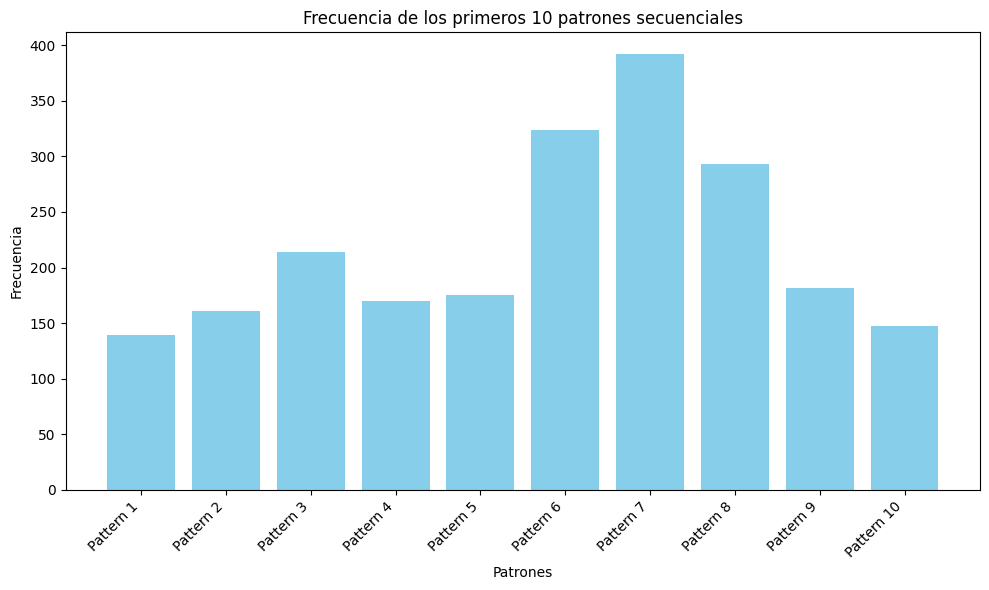

In [ ]:
import matplotlib.pyplot as plt
# Obtener las frecuencias de los patrones
frequencies = [pattern[1] for pattern in output[:10]]
patterns = [f'Pattern {i}' for i in range(1, 11)]
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(patterns, frequencies, color='skyblue')
plt.xlabel('Patrones')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los primeros 10 patrones secuenciales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

Los patrones en el 6º,7º y 8º lugar, son los que más frecuencias tienen y, por lo tanto, son los que tendremos en cuenta en nuestro estudio.